# Classification 1

# Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


In [4]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [5]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [6]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                    intercept_scaling=1, l1_ratio=None, max_iter=100, 
                    multi_class='auto', n_jobs=None, penalty='12',
                    random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False)

LogisticRegression(penalty='12', random_state=0, solver='liblinear')

In [8]:
#atau dengan menggunakan
model = LogisticRegression(solver='liblinear', random_state=0).fit(x,y)

In [9]:
model.classes_

array([0, 1])

In [10]:
print(model.intercept_) #b0
print(model.coef_) #b1

[-1.04608067]
[[0.51491375]]


In [11]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [12]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [13]:
model.score(x,y)

0.9

In [14]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

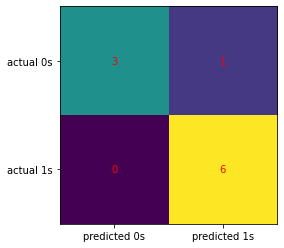

In [26]:
cm = confusion_matrix(y, model.predict(x))

ax = plt.subplot()
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('predicted 0s', 'predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('actual 0s', 'actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show() 

In [27]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [29]:
#meningkatkan model
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x,y)

In [30]:
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True, 
                    intercept_scaling=1, l1_ratio=None, max_iter=100, 
                    multi_class='auto', n_jobs=None, penalty='12',
                    random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False)

LogisticRegression(C=10.0, penalty='12', random_state=0, solver='liblinear')

In [31]:
print(model.intercept_)
print(model.coef_)

[-3.51335372]
[[1.12066084]]


In [32]:
print(model.predict_proba(x))

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [33]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [34]:
model.score(x,y)

1.0

In [35]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Logistic Regression : Handwriting Recognition

In [36]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
x, y = load_digits(return_X_y=True)
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0 )

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [41]:
model = LogisticRegression(solver='liblinear', C=0.05, random_state=0, multi_class='ovr')
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [42]:
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True, 
                    intercept_scaling=1, l1_ratio=None, max_iter=100, 
                    multi_class='ovr', n_jobs=None, penalty='12',
                    random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False)

LogisticRegression(C=0.05, multi_class='ovr', penalty='12', random_state=0,
                   solver='liblinear')

In [43]:
x_test = scaler.transform(x_test)

In [44]:
y_pred = model.predict(x_test)

In [45]:
model.score(x_train, y_train)

0.964509394572025

In [46]:
model.score(x_test, y_test)

0.9416666666666667

In [47]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

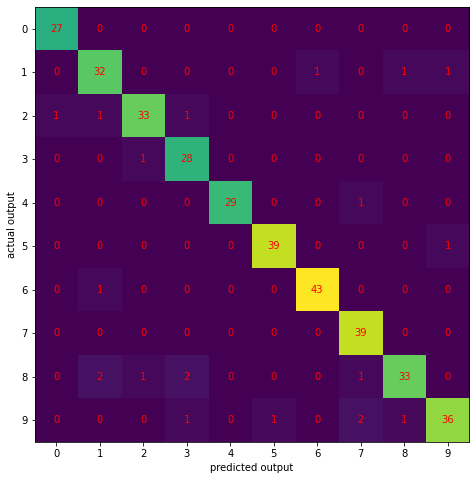

In [50]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
ax = plt.subplot()
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('predicted output')
ax.set_ylabel('actual output')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show() 

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



# KNN

## example 1

In [52]:
weather = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy']
temp = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild']
play = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']

In [53]:
#label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

weather_encoded = le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [54]:
temp_encoded = le.fit_transform(temp)
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [58]:
label = le.fit_transform(play)
print(label)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [56]:
features = list(zip(weather_encoded, temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(features, label)
predicted = model.predict([[0,2]]) #cuaca mendung(overcast), suhu sedang(mild)
print(predicted) 

[1]


## KNN with multiple labels

In [61]:
from sklearn import datasets

In [62]:
wine = datasets.load_wine()

In [63]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [64]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [65]:
wine.data.shape

(178, 13)

In [68]:
wine.target.shape

(178,)

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test) #cuaca mendung(overcast), suhu sedang(mild)
print(y_pred) 

[1 1 1 0 0 0 1 0 1 1 1 0 2 1 0 1 0 2 0 0 2 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 2 0 2 0 0 1 1]


In [91]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6296296296296297


In [92]:
#dengan k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test) #cuaca mendung(overcast), suhu sedang(mild)
print(y_pred)

[1 1 1 0 0 0 1 0 1 1 2 0 2 1 0 1 0 2 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 2 1 0 1 2 0 2 0 0 1 2]


In [93]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6296296296296297


In [94]:
#mencari tahu nilai k yang optimal
error = []
for i in range(1,40): #nilai k
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

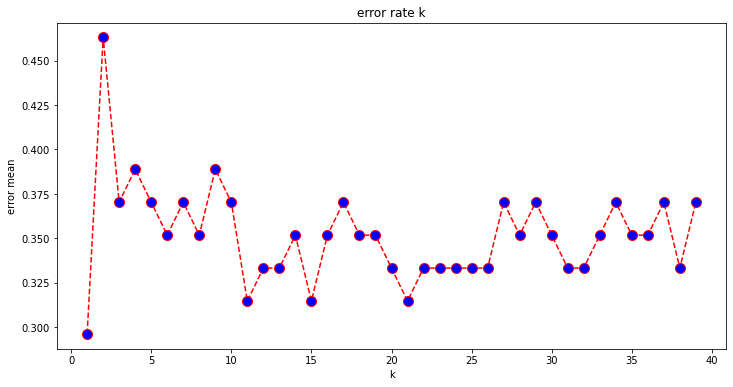

In [95]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('error rate k')
plt.xlabel('k')
plt.ylabel('error mean')
plt.show()

In [96]:
#terlihat pada tabel bahwa error terkecil k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test) #cuaca mendung(overcast), suhu sedang(mild)
print(y_pred)

[1 0 1 0 0 0 1 0 2 2 2 0 1 2 0 1 0 1 2 0 2 1 1 1 0 1 2 1 0 0 2 1 1 1 1 1 1
 1 1 2 0 1 1 0 2 0 1 0 0 1 0 0 1 2]


In [97]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7037037037037037
